Data Science Revealed with Python by Tshepo Chris Nokeri, Apress. 2021

# CHAPTER 9: PRINCIPAL COMPONENT ANALYSIS WITH SCIKIT-LEARN, PYSPARK, AND H2O

This chapter executes a dimension reducer (principal component analysis) using a diverse set of comprehensive Python frameworks (i.e., SciKit-Learn, PySpark, and H2O).

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set("talk","ticks",font_scale=1,font="Calibri")
from pylab import rcParams
plt.rcParams["figure.dpi"] = 300
df = pd.read_csv(r"C:\Users\i5 lenov\Documents\MLAgortihms\Datasets\Mall_Customers.csv")

In [2]:
drop_column_names = df.columns[[0, 1]]
initial_data = df.drop(drop_column_names, axis="columns")

In [3]:
from sklearn.preprocessing import StandardScaler
sk_standard_scaler = StandardScaler()
sk_standard_scaled_data = sk_standard_scaler.fit_transform(initial_data)

# SciKit-Learn in Action

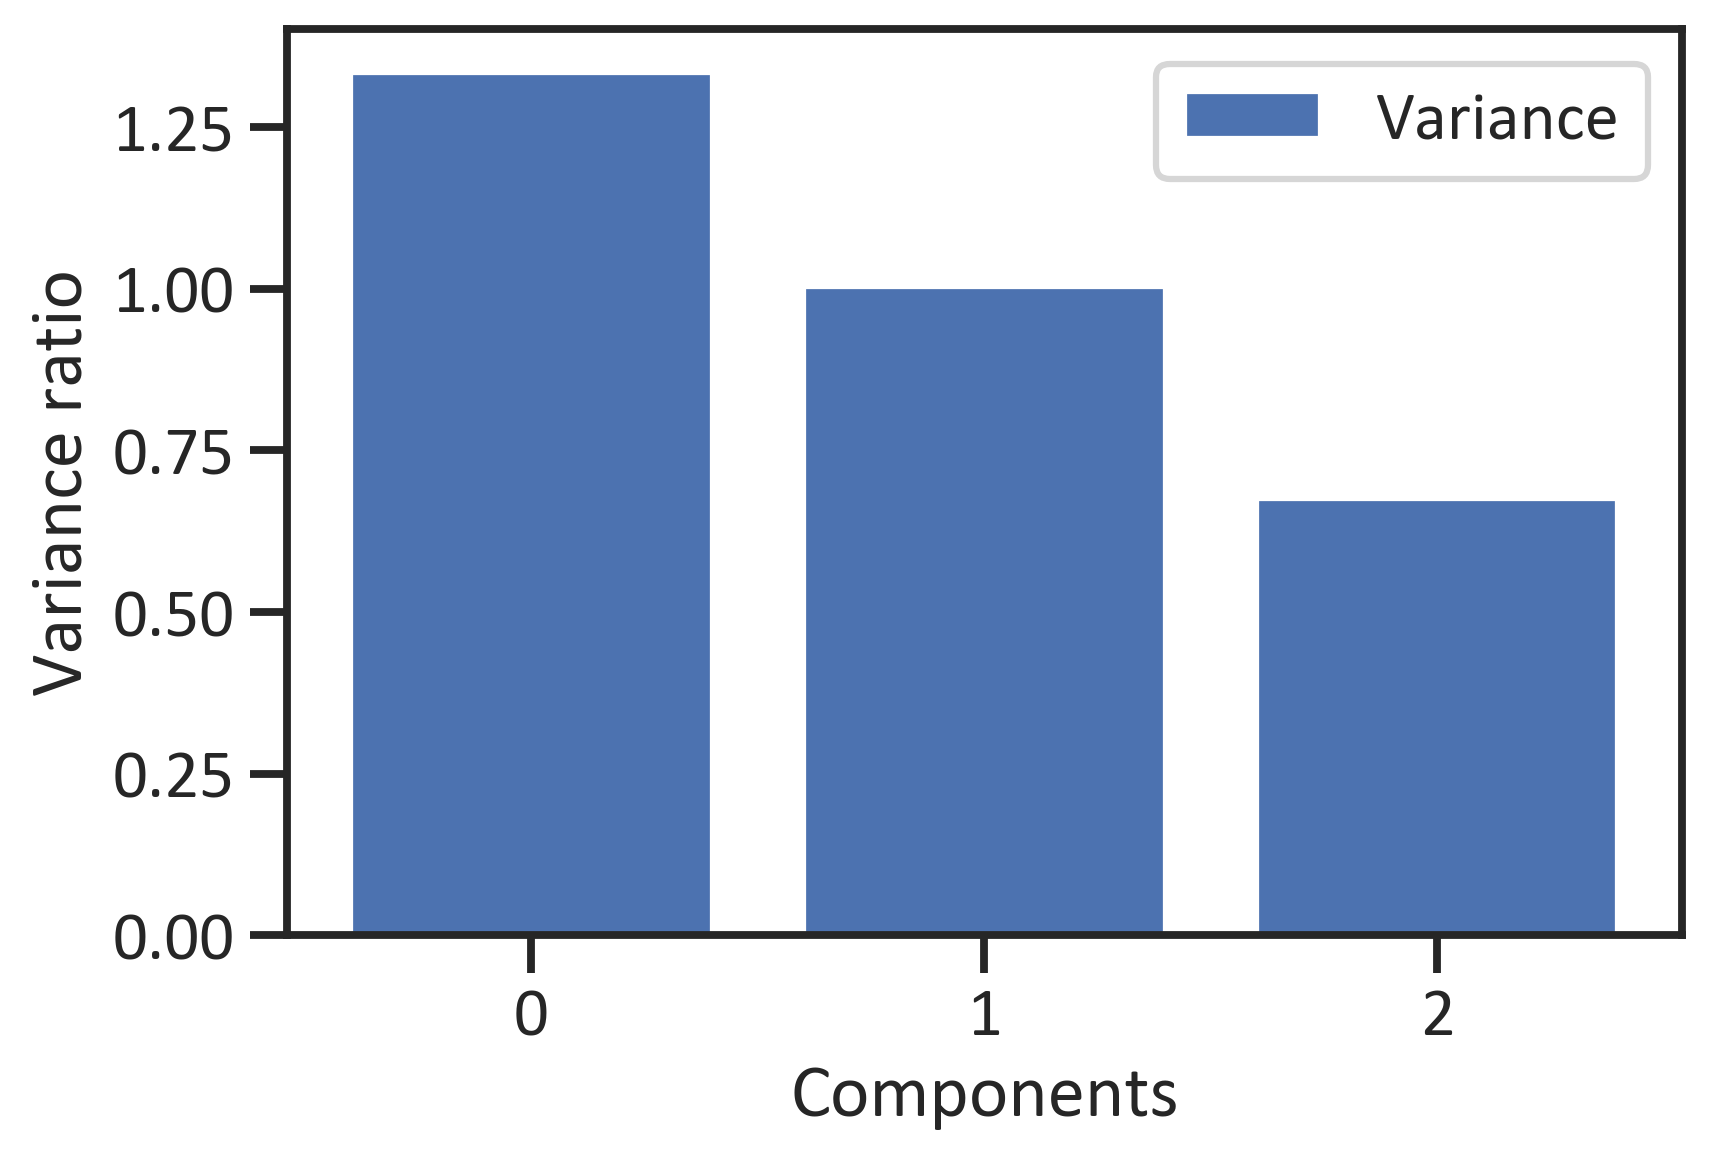

In [4]:
from sklearn.decomposition import PCA
sk_principal_component_method = PCA(n_components=3)
sk_principal_component_method.fit_transform(sk_standard_scaled_data)
sk_principal_component_method_variance = sk_principal_component_method.explained_variance_
plt.bar(range(3), sk_principal_component_method_variance, label="Variance")
plt.legend()
plt.ylabel("Variance ratio")
plt.xlabel("Components")
plt.show()

In [24]:
print("SciKit-Learn PCA explained variance ratio", sk_principal_component_method_variance)

SciKit-Learn PCA explained variance ratio [1.33465831 1.00427272 0.67614435]


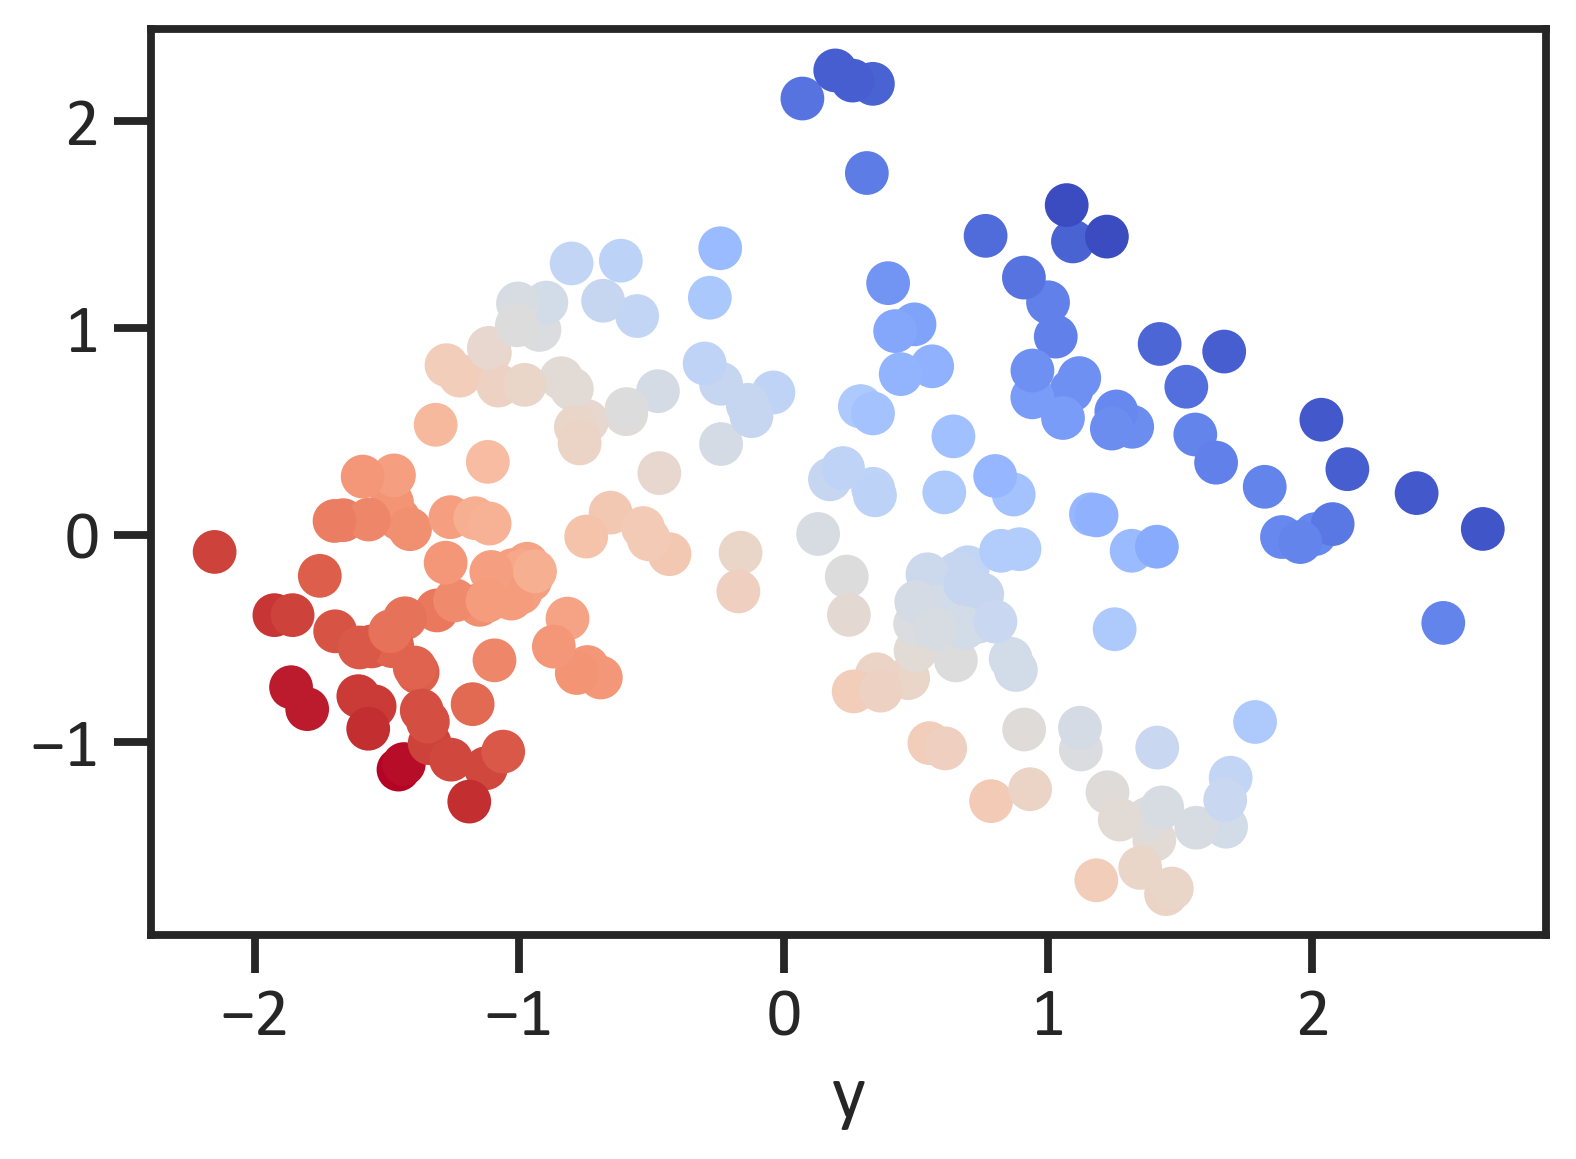

In [5]:
sk_principal_component_method_ = PCA(n_components=3)
sk_principal_component_method_.fit(sk_standard_scaled_data)
sk_principal_component_method_reduced_data = sk_principal_component_method_.transform(sk_standard_scaled_data)
plt.scatter(sk_principal_component_method_reduced_data[:,0], sk_principal_component_method_reduced_data[:,2], c=initial_data.iloc[::, -1], cmap="coolwarm")
plt.xlabel("y")
plt.show()

# PySpark in Action

In [6]:
import findspark as initiate_pyspark
initiate_pyspark.init("C:\Spark\spark-3.0.0-bin-hadoop2.7")

In [7]:
from pyspark import SparkConf
pyspark_configuration = SparkConf().setAppName("pyspark_principal_component_method").setMaster("local")

In [8]:
from pyspark import SparkContext
pyspark_context = SparkContext(conf=pyspark_configuration)

In [9]:
from pyspark.sql import SparkSession
pyspark_session = SparkSession(pyspark_context)

In [10]:
pyspark_initial_data = pyspark_session.createDataFrame(initial_data)
pyspark_initial_data = pyspark_initial_data.na.drop()

In [11]:
x_list = list(initial_data.iloc[::, 0:3].columns)
from pyspark.ml.feature import VectorAssembler
pyspark_data_columns = x_list
pyspark_vector_assembler = VectorAssembler(inputCols=pyspark_data_columns, outputCol="variables")
pyspark_data = pyspark_vector_assembler.transform(pyspark_initial_data)

In [12]:
from pyspark.ml.feature import StandardScaler
pyspark_standard_scaler = StandardScaler(inputCol = pyspark_data.columns[-1], outputCol = "pyspark_scaled_features", withMean = True, withStd = True).fit(pyspark_data)
pyspark_data_scaled_data = pyspark_standard_scaler.transform(pyspark_data)

In [23]:
from pyspark.ml.feature import PCA
number_of_k = 3
pyspark_principal_components_method = PCA(k = number_of_k, inputCol = pyspark_data_scaled_data.columns[-1], outputCol = "pca_reduced_features").fit(pyspark_data_scaled_data)
pyspark_principal_components_method_data = pyspark_principal_components_method.transform(pyspark_data_scaled_data)

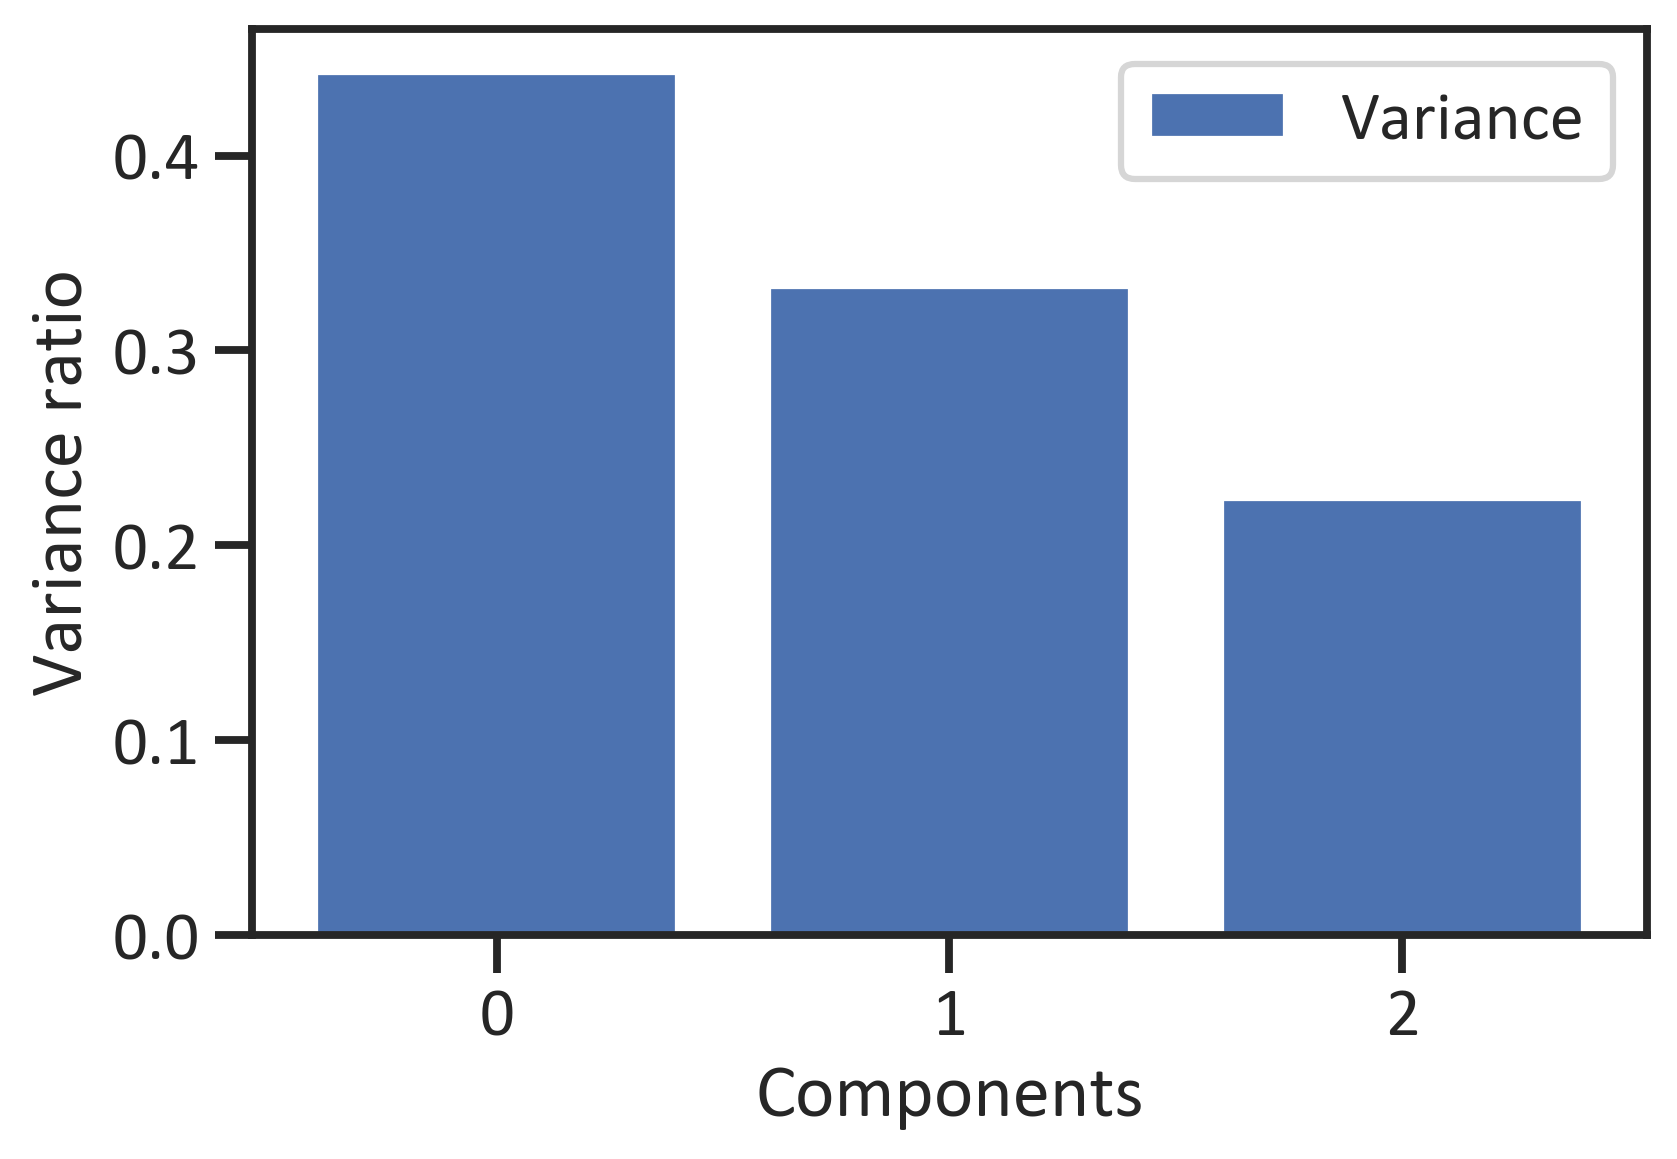

In [22]:
pyspark_principal_component_method_variance = pyspark_principal_components_method.explainedVariance.toArray()
plt.bar(range(3), pyspark_principal_component_method_variance, label="Variance")
plt.legend()
plt.ylabel("Variance ratio")
plt.xlabel("Components")
plt.show()

In [25]:
print("PySpark PCA variance ratio", pyspark_principal_component_method_variance)

PySpark PCA variance ratio [0.44266167 0.33308378 0.22425454]


In [14]:
pyspark_principal_components_method_reduced_data = pyspark_principal_components_method_data.rdd.map(lambda row: row.pyspark_scaled_features).collect()
pyspark_principal_components_method_reduced_data = np.array(pyspark_principal_components_method_reduced_data)

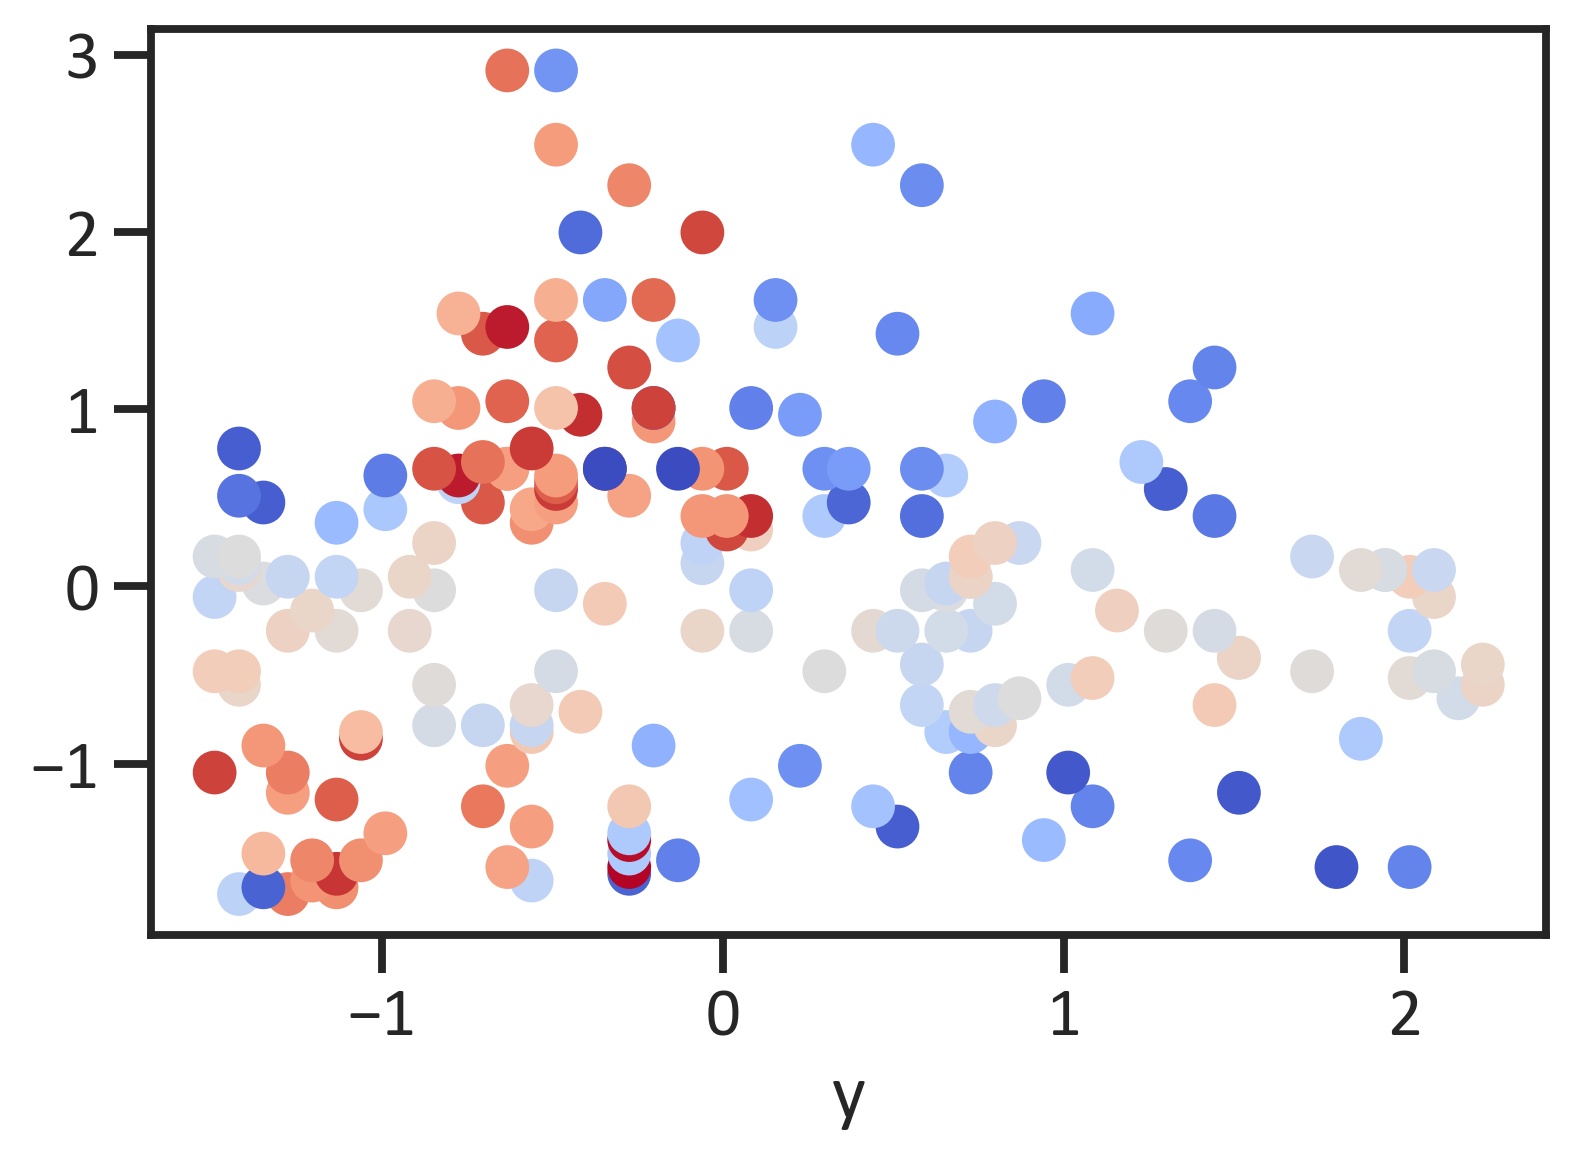

In [15]:
plt.scatter(pyspark_principal_components_method_reduced_data[:,0], pyspark_principal_components_method_reduced_data[:,1], c=initial_data.iloc[::, -1],cmap = "coolwarm")
plt.xlabel("y")
plt.show()

## H2O in Action

In [16]:
import h2o as initialize_h2o
initialize_h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM (build 11.0.6+8-b765.1, mixed mode)
  Starting server from C:\Users\i5 lenov\AppData\Roaming\Python\Python37\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\I5LENO~1\AppData\Local\Temp\tmpo5onh0c9
  JVM stdout: C:\Users\I5LENO~1\AppData\Local\Temp\tmpo5onh0c9\h2o_i5_lenov_started_from_python.out
  JVM stderr: C:\Users\I5LENO~1\AppData\Local\Temp\tmpo5onh0c9\h2o_i5_lenov_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Africa/Harare
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.7
H2O_cluster_version_age:,"1 year, 1 month and 3 days !!!"
H2O_cluster_name:,H2O_from_python_i5_lenov_unqukj
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.975 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"accepting new members, healthy"


In [17]:
h2o_data = initialize_h2o.H2OFrame(initial_data)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [18]:
h2o_training_data, h2o_validation_data = h2o_data.split_frame(ratios=[.8])

In [19]:
from h2o.estimators import H2OPrincipalComponentAnalysisEstimator
h2o_principal_components_method = H2OPrincipalComponentAnalysisEstimator(k = 3, transform = "standardize")
h2o_principal_components_method.train(training_frame = h2o_training_data)

pca Model Build progress: |███████████████████████████████████████████████| 100%


In [20]:
h2o_yhat = h2o_principal_components_method.predict(h2o_validation_data)

pca prediction progress: |████████████████████████████████████████████████| 100%
